# Data Preparation and Processing

https://www.youtube.com/watch?v=qFJeN9V1ZsI&list=WL&index=3&t=55s&ab_channel=freeCodeCamp.org

- Create a virtual environment

        python3 venv ./venv

- Install tensorflow

        pip install tensorflow

# Explanations

To mode details check the [site](https://deeplizard.com/learn/video/dzoh8cfnvnI)

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples= []

Example data:

- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial
- The trial has 2100 participants. Half where under 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects
- Around 95% of patients under 65 experienced no side effects

Detailed 
- 65 or older 
    - 95% : side effect
    - 5%: no side effect
    
- under 65
    - 95% : no side effect
    - 5% : side effect
    
Population size: 2100 individuals
- 5 %:  53 individuals
- 50 %: 1050 individuals 
- 95 %: 997 individulas


# Here we generate our dataset

We will label as:
- 0 who did not experienced side effects
- 1 who experienced side effects

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # the ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # the ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    
    

# Change data structure format

It is necessary to provide the data to *fit function* as required by Keras.

For this we will tranform it into a numpy array.

https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [5]:
len(train_samples)

2100

To turn our data more realist we need suffle the data (change all positions to avoid the labels are put in sequential order)

In [6]:
train_labels, train_samples = shuffle(train_labels, train_samples)

**Scale Values**

Neural Networks requires a scaler data to provide better results. 

In this case our case the age goes from 13 to 100- Thus, we rescale data to values from 0 to 1.

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
train_samples[0:10]

array([81, 62, 38, 59, 53, 30, 63, 36, 52, 70])

In [9]:
scaled_train_samples[0:10]

array([[0.7816092 ],
       [0.56321839],
       [0.28735632],
       [0.52873563],
       [0.45977011],
       [0.1954023 ],
       [0.57471264],
       [0.26436782],
       [0.44827586],
       [0.65517241]])

# Build Neural Network

For this purpose we are using Sequential Models.

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

- To run using GPU: active the next cell

*Important notes*

- The sequential layer doesn't requires the input layer. 
- The information of the input layer is passed in the first hidden layer. The number of nodes (units) is arbitrary 
- The last hidden layer only contains two nodes that is the the possible values for the output (0 or 1). The softmax activalion evaluates the probability for each output class.

In [18]:
model = Sequential([
    # first hidden layer requires the shape of the input data
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    # output layer: full connected layer
    Dense(units=2, activation="softmax")
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Train an ANN

**Set model parameters**
- choose an optimizer
- choose a learning rate
- choose a loss function
- choose the metrics to judge the model

**Fit the model**
- x: input data
- y: target data
- batch_size: how many samples are included in one batch to be passed and processed by the network in one time
- epochs: number or trainning times that the model will train data before finished the entire training process
- shuffle: to guarantee that the model not have any bias
- verbose: to see information related with the fit function

**To check the health of the model**

While the epoch number increases
- loss function decreases (convergency model)
- accuracy increases


In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, 
         batch_size=10, epochs=30,
         shuffle=True, verbose=2)

Epoch 1/30
210/210 - 0s - loss: 0.6860 - accuracy: 0.5610
Epoch 2/30
210/210 - 0s - loss: 0.6691 - accuracy: 0.6052
Epoch 3/30
210/210 - 0s - loss: 0.6472 - accuracy: 0.6971
Epoch 4/30
210/210 - 0s - loss: 0.6223 - accuracy: 0.7462
Epoch 5/30
210/210 - 0s - loss: 0.5934 - accuracy: 0.7900
Epoch 6/30
210/210 - 0s - loss: 0.5658 - accuracy: 0.8114
Epoch 7/30
210/210 - 0s - loss: 0.5391 - accuracy: 0.8271
Epoch 8/30
210/210 - 0s - loss: 0.5126 - accuracy: 0.8390
Epoch 9/30
210/210 - 0s - loss: 0.4866 - accuracy: 0.8471
Epoch 10/30
210/210 - 0s - loss: 0.4613 - accuracy: 0.8619
Epoch 11/30
210/210 - 0s - loss: 0.4373 - accuracy: 0.8695
Epoch 12/30
210/210 - 0s - loss: 0.4149 - accuracy: 0.8800
Epoch 13/30
210/210 - 0s - loss: 0.3949 - accuracy: 0.8981
Epoch 14/30
210/210 - 0s - loss: 0.3772 - accuracy: 0.9000
Epoch 15/30
210/210 - 0s - loss: 0.3616 - accuracy: 0.9076
Epoch 16/30
210/210 - 0s - loss: 0.3481 - accuracy: 0.9110
Epoch 17/30
210/210 - 0s - loss: 0.3364 - accuracy: 0.9205
Epoch 

# Create a validation set on the training

Validation dataset help us tho see how much generalized our model is because validation dataset use a dataset that our model hasn't seen before. More than that, when we test our model we have more guarantee that our model is already generalized and is not overfitting. 

The testing model step is an additional step that gives us a secuity to deploy the model to production if we see that model is well generalized.

100% dataset split as, for instance:
- 10%: test
- 20%: validation
- 70%: train

https://deeplizard.com/learn/video/dzoh8cfnvnI

We can provide the valdiation dataset to the model in two ways:
- giving the validation dataset and pass it to the *validation_data* parameter
- or, tells a percentage of training dataset that foes to vcalidation dataset pass it to *validation_split* parameter

**Very Important Note**

Suffle:
- 1rst: split training set into validation
- 2nd: shuffle training set

It can introduces a critical problem into model. 
Suppose our data has a sequency like [0 0 0 0 0 0 0 1 1 1]. If we say to pick 30% of training set to validation set we will be selecting only [1 1 1]. We need to avoid this situation, once we always want the validtion dataset has a similar aspect of our train dataset, otherwise we will have a bias validation dataset.

To avoid this we already suffle dataset when we built the *train_labels, train_samples.*

Re-run the cells 
        
        model = Sequential(...)
        model.compile

In [20]:
model.fit(x=scaled_train_samples, y=train_labels, 
          validation_split=0.1, 
          batch_size=10, epochs=30, 
          shuffle= True, verbose=2
         )

Epoch 1/30
189/189 - 0s - loss: 0.6782 - accuracy: 0.5444 - val_loss: 0.6630 - val_accuracy: 0.6143
Epoch 2/30
189/189 - 0s - loss: 0.6491 - accuracy: 0.6354 - val_loss: 0.6340 - val_accuracy: 0.6619
Epoch 3/30
189/189 - 0s - loss: 0.6206 - accuracy: 0.6878 - val_loss: 0.6030 - val_accuracy: 0.6952
Epoch 4/30
189/189 - 0s - loss: 0.5878 - accuracy: 0.7439 - val_loss: 0.5688 - val_accuracy: 0.7524
Epoch 5/30
189/189 - 0s - loss: 0.5549 - accuracy: 0.7820 - val_loss: 0.5357 - val_accuracy: 0.8190
Epoch 6/30
189/189 - 0s - loss: 0.5240 - accuracy: 0.8127 - val_loss: 0.5053 - val_accuracy: 0.8381
Epoch 7/30
189/189 - 0s - loss: 0.4949 - accuracy: 0.8354 - val_loss: 0.4765 - val_accuracy: 0.8524
Epoch 8/30
189/189 - 0s - loss: 0.4674 - accuracy: 0.8402 - val_loss: 0.4488 - val_accuracy: 0.8667
Epoch 9/30
189/189 - 0s - loss: 0.4414 - accuracy: 0.8566 - val_loss: 0.4231 - val_accuracy: 0.8810
Epoch 10/30
189/189 - 0s - loss: 0.4177 - accuracy: 0.8730 - val_loss: 0.3997 - val_accuracy: 0.8857

**Observations**

Train and validation; accuracy and loss:
 - loss decreasing while accuracy is increasing -> model is generalizing well
 - validation accuracy lagging behind our train accuracy => overfitting. The model is not generalize enough.


# Prepare a Test set

After train and validate our model we test our model. For this we need a test dataset.

Here we create our test dataset.

In [21]:
test_labels = []
test_samples= []

In [22]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # the ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # the ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [23]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels, test_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

We pass our model knowledge to our test datset to get the prediction. After that we need to compare the predictions with the lables that are expected. We want to predict well the value of the most of the labels. 

In [25]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

**Understanding Predicitons output**

Predictions gives us the probabilities of:
- 0 : patient not experiencing a side effect
- 1 : patient experiencing a side effect

We know this positions because in:
- Zero Index is the Label:0
- and, in the 1rst Index is the Label:1

For instance:
- [0.9558285 , 0.04417155]: 95% our model is confident to predict with label 0
- [0.14550203, 0.85449797]: 85% our model is confident to predict with label 1

In [35]:
predictions[0:30]

array([[0.9558285 , 0.04417155],
       [0.14550203, 0.85449797],
       [0.16348317, 0.83651686],
       [0.02201087, 0.97798914],
       [0.955617  , 0.04438291],
       [0.03938941, 0.9606106 ],
       [0.5395932 , 0.4604068 ],
       [0.9557504 , 0.04424957],
       [0.10126381, 0.89873624],
       [0.93284386, 0.06715616],
       [0.04547286, 0.95452714],
       [0.5395932 , 0.4604068 ],
       [0.95631784, 0.0436821 ],
       [0.77919966, 0.22080034],
       [0.9549095 , 0.04509043],
       [0.8897054 , 0.11029457],
       [0.02045326, 0.9795467 ],
       [0.43667734, 0.5633226 ],
       [0.8229676 , 0.17703243],
       [0.8754409 , 0.1245591 ],
       [0.955617  , 0.04438291],
       [0.9242166 , 0.07578335],
       [0.03409072, 0.96590924],
       [0.75458556, 0.2454144 ],
       [0.95575815, 0.0442419 ],
       [0.94443196, 0.05556807],
       [0.04884086, 0.9511591 ],
       [0.07932371, 0.92067635],
       [0.02045326, 0.9795467 ],
       [0.04547286, 0.95452714]], dtype=flo

In [33]:
test_labels[0:30]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1])

In [34]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions[0:30]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1])

# Confusion Matrix

Gives us a better way to see how accurate our model was at inferring on test data

In [36]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [37]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

**Confusion matrix visualization**

In [38]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[197  13]
 [  9 201]]


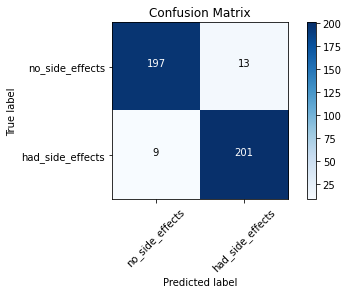

In [39]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**Confusion Matrix Intetpretation**

The Confusion Matrix shows:
- 9 patients were wrong predicted as no side effects 
- and, 13 patients were wrong predicted as had_side_effects.


# Save and Load Keras Sequential Model

## 1. model.save()

In [42]:
# Checks first to see if file exists already.
# If not, the model is save to disk

import os.path

#If the file is not found on disk it saves the model
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save functions save:
- The architecture of the model, allowing to re-create the model.
- The weights of the model
- The training configuration (loss, optmizer)
- The state of the optimizer, allowing to resume training exactly where you left off.

## 2. load_model

In [43]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

We can see the model has the same architecture as the model that we built.

In [44]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### weights

In [45]:
new_model.get_weights()

[array([[-0.10573104,  0.62871176,  0.3259824 , -0.05010688, -0.22561619,
         -0.32110667, -0.13801318, -0.43255848, -0.12636214,  0.57012707,
         -0.492315  ,  0.40340227, -0.53454095,  0.16274261,  0.3636412 ,
         -0.45543304]], dtype=float32),
 array([ 0.        , -0.0922956 , -0.10957147,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.11234007,
         0.        , -0.130313  ,  0.        ,  0.06896851, -0.11814047,
         0.        ], dtype=float32),
 array([[ 0.23161975, -0.3134859 ,  0.1309441 , -0.02229923, -0.24890715,
         -0.16309683, -0.26957148, -0.04601139, -0.23957019, -0.04272231,
         -0.08149946,  0.08133566, -0.11735907, -0.29037863,  0.08751985,
          0.07381725,  0.01250505,  0.290754  ,  0.01183128,  0.31999567,
          0.06517303, -0.26023057,  0.00950581, -0.07651868, -0.30238265,
          0.1115891 ,  0.16762373,  0.2817001 ,  0.08855566, -0.24807575,
         -0.05815929, -0.2637114 ],
 

### optimizer

In [46]:
new_model.optimizer

## 3. Save model into json format file

If you only need to save the achitecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In this case you need to retrain the model because we don't have the model weights saved, and for that we need the compile, the optimizer and loss, etc.

In [48]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [49]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "

### Load JSON model file

In [50]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensor.flow.kearas import model_from_yaml
# model = model_from_yaml(yaml_string)

In [52]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 4. Save only the weights  of the model

If you only need to save the weights of a model, you can use the following function save thhe weights only.

In [54]:
# Checks first to see if file exists already.
# If not, the model is save to disk

import os.path

# If the file is not found on disk it saves the model
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save('models/my_model_weights.h5')

When we save only the weights if we want to load them at a later time then we don't have a model already in place because we didn't save the model itself we only save the weights. So to be able to bring our weights to a new model then we need to create a second model at that model with the same architecture and then could load the weights in. 

In [57]:
model2 = Sequential([
    # first hidden layer requires the shape of the input data
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    # output layer: full connected layer
    Dense(units=2, activation="softmax")
])

Now we can load the weights, and the shape of these weights is going to have to match the shape of what this model architecture is essentially.

In [58]:
# insert weights into model
model2.load_weights('models/my_model_weights.h5')

# get the weights
model2.get_weights()

[array([[-0.10573104,  0.62871176,  0.3259824 , -0.05010688, -0.22561619,
         -0.32110667, -0.13801318, -0.43255848, -0.12636214,  0.57012707,
         -0.492315  ,  0.40340227, -0.53454095,  0.16274261,  0.3636412 ,
         -0.45543304]], dtype=float32),
 array([ 0.        , -0.0922956 , -0.10957147,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.11234007,
         0.        , -0.130313  ,  0.        ,  0.06896851, -0.11814047,
         0.        ], dtype=float32),
 array([[ 0.23161975, -0.3134859 ,  0.1309441 , -0.02229923, -0.24890715,
         -0.16309683, -0.26957148, -0.04601139, -0.23957019, -0.04272231,
         -0.08149946,  0.08133566, -0.11735907, -0.29037863,  0.08751985,
          0.07381725,  0.01250505,  0.290754  ,  0.01183128,  0.31999567,
          0.06517303, -0.26023057,  0.00950581, -0.07651868, -0.30238265,
          0.1115891 ,  0.16762373,  0.2817001 ,  0.08855566, -0.24807575,
         -0.05815929, -0.2637114 ],
 